<center>
<h1> График Бланда-Альтмана </h1>
<h2>(Bland–Altman plot) </h2>
<center>

### Abstract: 
Представим, что у нас есть один старый прибор, который уже испытан в миллионах случаев, и ни разу не ошибался. Сегодня ребята из R&D отдела принесли нам новый прибор, который измеряет тот же параметр, но быстрее. 

Главный вопрос: ***как определить, можно ли заменить вторым прибором первый?***

Попробуем сделать десятки (а то и сотни) замеров, чтобы сравнить, насколько показатели второго приборы сходятся с первым:
*"Одно значение чуть больше, другое чуть меньше, это отличатся сильно, а тут вроде бы похоже..."* На глаз сравнить не получится.

До определённого времени для решения этой задачи применяли коэффициент корреляции Пирсона *(не путать с критерием Пирсона!)*. Но то, что показывает Пирсон, для этой задачи во многих случаях оказалось неприменимо, поэтому на смену ему пришёл критерий Бланда-Альтмана.

**Далее в этом файле - почему Пирсон здесь не подходим, и как работает Бланд-Альтман.**

!!! *Коэффициент корреляции Пирсона до сих пор исользуется во многих задачах, но не в той, которая описана в Abstract и которая будет разибираться далее.*

In [57]:
import math
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Коэфициент корреляции Пирсона (r)

$$ r = \frac {\sum {(x_i - \bar{x})*(y_i - \bar{y})}} {\sqrt{{\sum {(x_i - \bar{x})^2}* \sum {(y_i - \bar{y})^2}}}}  $$

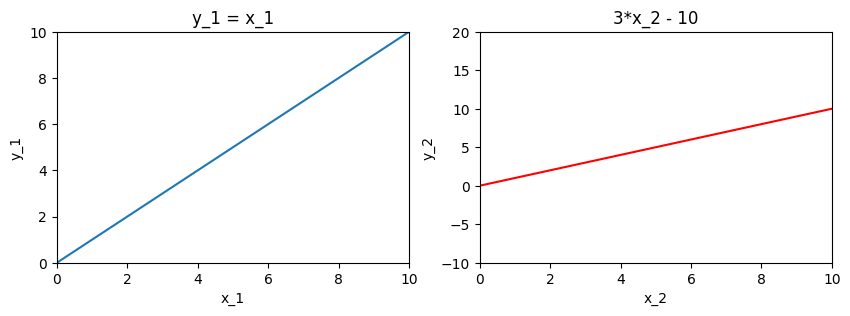

In [53]:
# создаем графики для наглядного понимания, что считает Пирсон
def linear_plot ():
    # созадем значения для x, после создаем функции y(x). Зачем? - объяснено ниже.  
    x_1 = np.linspace (0,10,100)
    y_1 = x_1
    x_2 = np.linspace (0,10,100)
    y_2 = 3*x_2 - 10
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax[0].plot(x_1,y_1)
    ax[0].set_title('y_1 = x_1')
    ax[0].set_xlabel ('x_1')
    ax[0].set_ylabel ('y_1')
    ax[1].plot (x_1, y_1, color = 'red')
    ax[1].set_title('3*x_2 - 10')
    ax[1].set_xlabel ('x_2')
    ax[1].set_ylabel ('y_2')
    ax[0].set(xlim = (0, 10), ylim = (0, 10))
    ax[1].set(xlim = (0, 10), ylim = (-10, 20))
    plt.show()
linear_plot()

Представим, два эксперимента: 1 и 2. В эксперименте 1 измеряем показатели двух приборов (x_1 и y_1) и в экспеименте два тоже измеряем показатели двух приборов (x_2 y_2).

*Смотрим на графики и заданные функции выше:*

Очевидно, что в первом случае (x_1 и y_1) заменить *прибор 1* *прибором 2* можно (и даже нужно, если измеряет показатели он быстрее): 

**"Значения y_1 в точности повторяют x_1" = "Прибор 2 (новый) по измерениям в точности совпадает со старым".**

А вот во втором случае так сделать нельзя: зависимость между показатлями есть (y_2 - функция от x_2), но y_2 и близко не показывает значений, похожих на x_2 (новый прибор по значениям очень сильно отклоняется от старого). Здесь все очевидно и наглядно, потому что данные прописаны как функции. 

В реальности у нас есть набор точек (измерений с приборов):

**Эксперимент 1:** x_1 - [...], y_1 - [...]

**Эксперимент 2:** x_2 - [...], y_2 - [...]

*Чтобы понять, насколько точен новый прибор, надо понять, насколько хорошо он сходится с первым.*
 
Используем для этого Пирсона и посмотрим, что "делает математически" эта формула:

Числитель: $$ \sum {(x_i - \bar{x})*(y_i - \bar{y})} $$

Видим произведение разностей i-ого значения и среднего. Числитель здесь "проверяет, вместе двигаются x и y или нет". Если (x) и (y) совместно растут сумма всегда положительная, если при росте (x) значения (y) убывают, сумма будет отрицательной. Если же значения хаотичны (x и y вообще никак не связаны), то сумма будет колебаться около нуля.

Знаменатель: $$ \sqrt{{\sum {(x_i - \bar{x})^2}* \sum {(y_i - \bar{y})^2}}}$$

Знаменатель в данном случае просто "стандартизатор". Деление на него = приведение числителя к диапазону {-1, 1}.
**В итоге:**

Если корреляция положительная: $$r \rightarrow 1$$
Если корреляция отрицательная: $$r \rightarrow -1$$
Если корреляции нет: $$r \approx 0$$

Теперь, если вернуться к нашему примеру, мы увидим, что в **Эксперименте 2**, когда значения не совпали, но мы видели корреляцию (y_2 зависит от x_2), r стремился бы к значению (1). И раньше (не моя придумка, а факт!) такой результат интерпретировали как 

*"раз коэффициент корреляции высокий, значения похожи, новым прибором можно заменить старый".*

Но мы с вами видим, что хоть зависимость и есть, значения абсолютно не совпадают! Если один градусник показывает 36, а другой 3*36-10 - это катастрофа (как для нового прибора, так и тем более для пациента). 

Корреляция есть, а согласованости нет. 

**Пирсон показывал корреляцию, а интерпретировали её (ошибочно) как согласнованность.**

### Part 2: Суть графика Бланда-Альтмана - *правильная альтернатива Пирсону в таких задачах*

**Суть метода:** *Мы анализируем не то, как методы коррелируют (движутся вместе), а то, насколько они «отклоняются друг от друга» (какова разница между значениями одного и другого).*

Есть набор значений, снятых прибором 1: [x_0, x_1, ... x_n]  
  
Есть набор значений, снятых прибором 2: [y_0, y_1, ... y_n] 

И сразу переходим к построению графика (конечно же, Бланда-Альтмана)
  
**Ось Y:** разность i-ых значений прибора 1 и прибора 2 
$$Diff_i = x_i - y_i$$
**Ось Х:** среднее i-ых значений прибора 1 и прибора 2
$$Mean_i = \frac {x_i - y_i}{2}$$

In [54]:
# Генерируем данные для графика
np.random.seed(99)
# генерируем данные, снятые прибором 1
data_list_1 = np.random.uniform(5, 10, 20)
print('data_list_1 =', data_list_1)
print('\n')
# данные, снятые прибором 2
data_list_2 = np.random.uniform(5, 10, 20)
print('data_list_2 =', data_list_2)
print('\n')
# данные снятые прибором 3
data_list_1_noise = data_list_1 + np.random.rand (20)
print ('data_list_1_noise =',data_list_1_noise)

'''здесь специльно сымитировал ситуацию, когда значения прибора (2) не похожи на значения прибора (1)
а вот значения прибора (3) очень близки к значениям прибора (1)'''

data_list_1 = [8.36139279 7.440392   9.12747587 5.15723194 9.04024982 7.8280871
 6.48811249 5.2334786  9.953137   5.03412867 8.84896514 8.7338355
 6.88719468 7.47073726 9.64474196 6.97727022 9.86978148 7.62207358
 5.46806547 9.06654206]


data_list_2 = [6.05843393 7.77172892 6.46134558 9.0807118  9.14021283 6.10788686
 8.22417351 5.47590811 7.05831619 5.48432631 5.72005499 6.06098088
 7.38328077 5.38806918 6.17521891 5.03276501 9.49322094 7.76117213
 5.83773314 9.64439092]


data_list_1_noise = [ 8.90348049  7.48215053  9.65235271  5.79737448  9.84090798  8.66300595
  6.74074472  6.20175212 10.41937513  5.29821984  9.39834356  9.11116929
  7.09092303  8.38619976 10.58391938  7.81476381 10.30257082  8.33818653
  6.31940946  9.14558875]


'здесь специльно сымитировал ситуацию, когда значения прибора (2) не похожи на значения прибора (1)\nа вот значения прибора (3) очень близки к значениям прибора (1)'

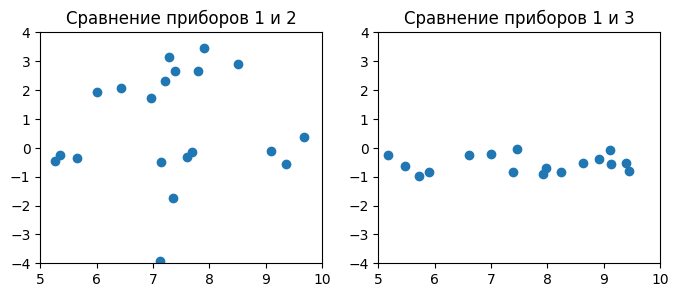

In [55]:
# считаем значени для осей (разность и среднее для каждого измерения, записанные в list)
# сравнение значений приборов 1 и 2
mean_1_2 = (data_list_1 + data_list_2)/2
diff_1_2 = data_list_1 - data_list_2
# сравнение значений приборов 1 и 3
mean_1_3 = (data_list_1 + data_list_1_noise)/2
diff_1_3 = data_list_1 - data_list_1_noise

# строим график Бланда-Альтмана
fig, ax = plt.subplots (1,2, figsize = (8,3))
ax[0].scatter (mean_1_2, diff_1_2)
ax[1].scatter (mean_1_3, diff_1_3)
ax[0].set(xlim = (5, 10), ylim = (-4, 4))
ax[1].set(xlim = (5, 10), ylim = (-4, 4))
ax[0].set_title('Сравнение приборов 1 и 2')
ax[1].set_title('Сравнение приборов 1 и 3')
plt.show()

Пока не перешли к "точным критериям", по которым стоит судить о графиках, просто посмотрите на сами графики.

Разница видна? - Уверен, да!
По оси Y мы отложили **разность значений**, снятых двумя разными приборами. 

Если разность большая - точки далеко разбросаны от нуля => разности большие => значения двух приборов не совпадают.

Если разность маленькая - точки "кучкуются" вокург нуля => разности маленькие => значения двух приборов совпадают 
(или отличаются очень незначительно)

### Part 3: На какие показатели на графике смотреть, чтобы дать точный ответ?

1) Систематическая ошибка - Bias ("Средняя разностей"): $$ \bar{diff} = \frac{\sum(diff_i)}{n} $$
2) LoA (Limits of Agreement): $$ LoA = \bar{d} \pm 1.96*σ $$

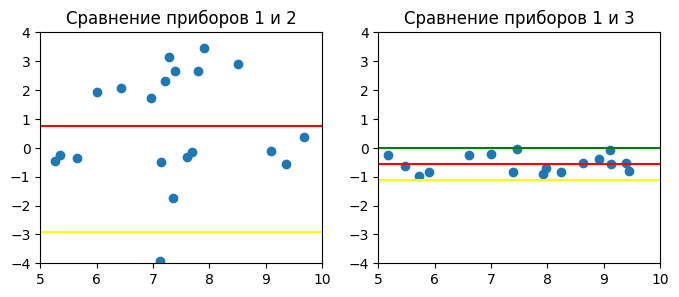

In [56]:
# считаем средние разностей и добавляем в график

# строим ещё раз сам график
fig, ax = plt.subplots (1,2, figsize = (8,3))
ax[0].scatter (mean_1_2, diff_1_2)
ax[1].scatter (mean_1_3, diff_1_3)
ax[0].set(xlim = (5, 10), ylim = (-4, 4))
ax[1].set(xlim = (5, 10), ylim = (-4, 4))
ax[0].set_title('Сравнение приборов 1 и 2')
ax[1].set_title('Сравнение приборов 1 и 3')

# Считаем среднее разностей и добавляем на график 
mean_diff_1_2 = np.mean (diff_1_2)
mean_diff_1_3 = np.mean (diff_1_3)
ax[0].axhline(y = mean_diff_1_2, color = 'red')
ax[1].axhline(y = mean_diff_1_3, color = 'red')


# теперь считаем стандартные отклонения:
std_1 = np.std (diff_1_2)
std_2 = np.std (diff_1_3)

# и наконец LoA
loa_1_up = mean_diff_1_2 + 1.96 * std_1
loa_1_down = mean_diff_1_2 - 1.96 * std_1
loa_2_up = mean_diff_1_3 + 1.96 *std_2
loa_2_down = mean_diff_1_3 - 1.96 * std_2
ax[0].axhline(y = loa_1_up, color = 'green')
ax[1].axhline(y = loa_2_up, color = 'green')
ax[0].axhline(y = loa_1_down, color = 'yellow')
ax[1].axhline(y = loa_2_down, color = 'yellow')

plt.show()

1) Смотим, как близко bias к нулю. Чем разности ближе к нулю, тем их среднее ближе к нулю, и в итоге тем меньше отличаются показатели наших двух приборов. На моём графике bias - красная линия. В обоих случаях она достаточно близка у нулю, но во втором всё-таки ближе, это видно.

2) Bias может обмануть: если есть отклонения разностей в обе стороны (иногда x больше y, иногда наоборот) - bias может усредниться и стать близким к нулю, хотя большинство разностей для отдельных значений отклоняются сильно от нуля в обе стороны. Важнее смотреть на LoA.

================================================================================================================================================

LoA - это среднее разностей (Bias) + 1.96 * σ (*стандарное отклонение*). 

Вспомним из базовой статистики: 1.96*σ - это тот диапазон, в котором лежит 95% значений, если у нас распределние **нормальное**.

================================================================================================================================================

##### Если LoA расположены близко к Bias - стандартные отклонения маленькие, все разности расположены близко к нулю. Эту ситуацию мы и видим на графике 2 (сравнение приборов 1 и 3). 
Какой вывод? - Прибор 3 достаточно точно повторяет значения прибора 1 (*разности их значений малы*) - **Хорошая согласованность.**

##### Если LoA расположены далеко от Bias - стандартные отклонения большие, все разности расположены далеко от нуля. Эту ситуацию мы видим на графике 1 (сравнение приборов 1 и 2). 
Какой вывод? - Прибор 2 достаточно ужасно повторяет значения прибора 1 (*разности их значений огромны!*) - **Плохая согласованность.**

P.S. *На графике 1 верхнее значение LoA оказалось очень большим и "улетело", но масштаб я менять не стал. Так даже лучше для наглядности (видно, насколько большие у нас стандартные отклонения и как сильно разбросаны значения разностей на первом графике, в отличие от второго).*